In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import the United States shape file
states = gpd.read_file('tl_2022_us_state/tl_2022_us_state.shp')
#states = states.to_crs("EPSG:5070")

# set state code as index, exclude states that we will never display
states = states.set_index('STUSPS').drop(index=['PR', 'VI', 'MP', 'GU', 'AS'])

conti = states.drop(index=['HI', 'AK'])
conti = conti.to_crs("EPSG:5070")

alaska = states.loc[['AK']]
hawaii = states.loc[['HI']]

In [7]:
datafile = r'TEMP/CO_data_prelim.csv'

In [8]:
data = pd.read_csv(datafile)

In [17]:
data.keys()

Index(['location', 'hubheight', 'rtr', 'xgap', 'period', 'Wm2Front', 'Wm2Back',
       'Wm2Ground', 'bedA_vals', 'bedB_vals', 'bedC_vals', 'edge_vals',
       'GHI_val', 'lat', 'lon'],
      dtype='object')

In [23]:
df = data[(data['hubheight']==1.5) &
         (data['rtr'] == 5.0) & 
         (data['xgap'] == 0.0) &
          (data['period'] == '5TO5')]
df = df[['lat', 'lon', 'bedA_vals', 'bedB_vals', 'bedC_vals', 'edge_vals']].reset_index()

In [24]:
df

,index,lat,lon,bedA_vals,bedB_vals,bedC_vals,edge_vals
0,0,39.22,-106.87,113318.567950,133823.312860,120039.076745,71251.865580
1,48,38.05,-103.53,114620.344770,132275.230710,107642.865800,64902.620505
2,96,37.15,-107.75,116935.410587,142763.738313,129312.293825,71108.597869
3,144,39.53,-107.72,109200.656938,128746.372218,116856.621523,66271.422425
4,192,40.50,-107.53,112124.607008,133866.078882,121410.578670,69257.431623
5,240,39.74,-105.18,104195.797570,123027.151610,101204.113618,63726.476970
6,288,38.28,-104.50,121036.443810,145014.922360,115757.607955,71413.178085
7,336,39.22,-106.32,115623.760955,139923.878688,120606.644200,72722.927998
8,384,39.65,-106.92,102864.565423,120963.190654,109762.616105,63868.632172
9,432,39.13,-108.53,112190.845583,133193.528780,123394.051132,71093.300152


In [28]:
geo_conti = gpd.GeoDataFrame(df['bedA_vals'], 
                 geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])],
                 crs = CRS('EPSG:4326')).to_crs(conti.crs)


In [29]:
geo_conti['bedA_vals'].quantile(q=0.98, interpolation='linear')

121813.5270259

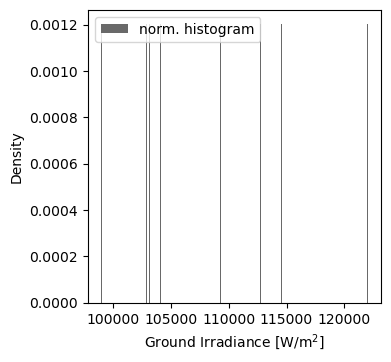

In [31]:
fig, ax = plt.subplots(figsize=(4,4))
geo_conti['bedA_vals'].plot.hist(bins=1000, density=True, color='dimgray', label='norm. histogram')

ax.legend()

for rect in ax.patches:
    if rect.get_x() < 0.0:
        rect.set_color('firebrick')

#ax.set_xlim(-2.5, 16)
#ax.set_ylim(0, 0.225)
ax.set_xlabel('Ground Irradiance [W/m$^2$]')
ax.set_ylabel('Density')
ax.set_box_aspect(1)
#ax.set_ylim(0, 0.01)
#ax.set_xlim(100,600)
plt.tight_layout()
plt.savefig('asdf.png', dpi=600)
plt.savefig('asdf.pdf')

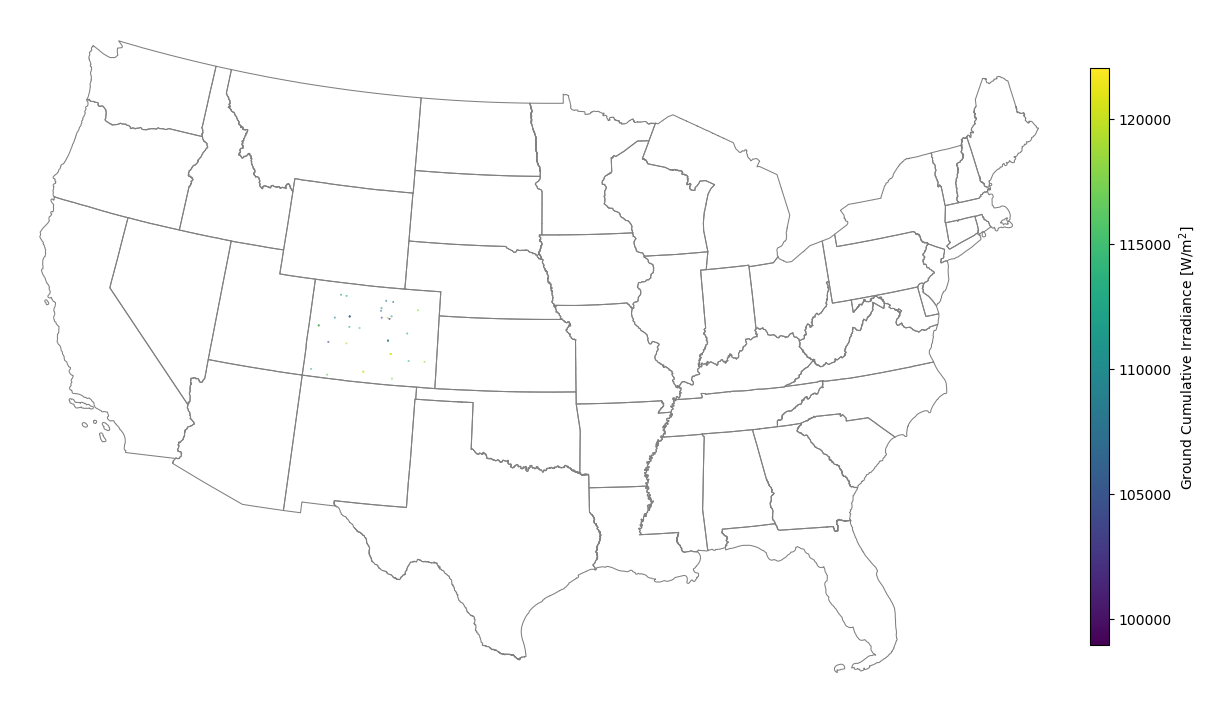

In [34]:
# create an axis with 2 insets − this defines the inset sizes
fig, continental_ax = plt.subplots(figsize=(13, 8))


# Set bounds to fit desired areas in each plot
continental_ax.set_xlim(-2.5E6, 2.5E6)
#continental_ax.set_ylim(22, 53)
continental_ax.axis('off')

# Plot the data per area - requires passing the same choropleth parameters to each call
# because different data is used in each call, so automatically setting bounds won’t work

#vmin = 200.0
#vmax = 600.0

bound_plot = {'color':'gray', 'lw':0.75 }

conti.boundary.plot(ax=continental_ax, **bound_plot)

cont_plot = {'column':'bedA_vals', 'cmap':'viridis', 'marker': 'o', 'markersize': 0.1}
             # 'vmin':vmin, 'vmax':vmax, 'marker':'o', 'markersize':0.1} #
legend_kwds={'shrink':0.75, 'drawedges':False, 'label':'Ground Cumulative Irradiance [W/m$^2$]', #'ticks': np.linspace(0,15, 16), 
             'pad':0, 'aspect':30}

geo_conti.plot(ax=continental_ax, legend=True, legend_kwds=legend_kwds, **cont_plot)

#continental_ax.set_title('Ground Irradiance Testbed C in June', fontsize=20, y=0.95)

plt.tight_layout()
#plt.savefig('AgriPV_TestbedC_June.png', dpi=600)